In [369]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

dataset=pd.read_csv('Testing Data Revised.csv')
dataset.head()

,Actor_1,Actor_2,Actor_3,Actor_4,Award
0,Haseena,Shaan,BABAR Ali,Rembo,No
1,Reema,Saud,Amman,Asif Sheikh,No
2,Sana,Shaan,Reema,MOAMER RANA,No
3,NOOR HASSAN,MOAMER RANA,Saima,Saud,No
4,Saima,Shaan,BABAR Ali,Nirma,No


In [370]:
target=dataset.Award
target

0       No
1       No
2       No
3       No
4       No
      ... 
214    Yes
215    Yes
216    Yes
217    Yes
218    Yes
Name: Award, Length: 219, dtype: object

In [371]:
inputs=dataset.drop('Award',axis=1)
inputs

,Actor_1,Actor_2,Actor_3,Actor_4
0,Haseena,Shaan,BABAR Ali,Rembo
1,Reema,Saud,Amman,Asif Sheikh
2,Sana,Shaan,Reema,MOAMER RANA
3,NOOR HASSAN,MOAMER RANA,Saima,Saud
4,Saima,Shaan,BABAR Ali,Nirma
...,...,...,...,...
214,Ali Zafar,Maya Ali,Javed Sheikh,Faisal Qureshi
215,Humayun saeed,Fahad Mustafa,Mehwish Hayyat,Ahmed Ali Butt
216,Mehwish Hayyat,Fahad Mustafa,HANIA AMIR,Mohsin Abbas Haider
217,Kiran Malik,Sunny Hinduja,Hajra Yamin,Shaista Javani


In [372]:
inputs.columns[inputs.isna().any()]


Index(['Actor_2', 'Actor_3', 'Actor_4'], dtype='object')

In [373]:
inputs['Actor_1'] = inputs['Actor_1'].fillna(value='NA')
inputs['Actor_2'] = inputs['Actor_2'].fillna(value='NA')
inputs['Actor_3'] = inputs['Actor_3'].fillna(value='NA')
inputs['Actor_4'] = inputs['Actor_4'].fillna(value='NA')

In [374]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
actor1=LabelEncoder()
actor2=LabelEncoder()
actor3=LabelEncoder()
actor4=LabelEncoder()

inputs['Actor_1'] = actor1.fit_transform(inputs['Actor_1'])
inputs['Actor_2'] = actor2.fit_transform(inputs['Actor_2'].astype(str))
inputs['Actor_3'] = actor3.fit_transform(inputs['Actor_3'].astype(str))
inputs['Actor_4'] = actor4.fit_transform(inputs['Actor_4'].astype(str))


In [375]:
inputs

,Actor_1,Actor_2,Actor_3,Actor_4
0,35,98,33,93
1,74,97,20,18
2,91,98,99,68
3,64,58,112,108
4,87,98,33,88
...,...,...,...,...
214,7,60,55,33
215,40,31,68,10
216,58,31,43,77
217,47,108,45,112


In [376]:
target.replace(('Yes','No'),(1,0),inplace=True)


In [377]:
target

0      0
1      0
2      0
3      0
4      0
      ..
214    1
215    1
216    1
217    1
218    1
Name: Award, Length: 219, dtype: int64

In [378]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2,random_state=42)

In [379]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [380]:
from sklearn.model_selection import cross_val_score
cross_val_score

<function sklearn.model_selection._validation.cross_val_score>

# Gaussian NB

In [381]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
nb_predict=model.predict(X_test)
Actor_1= input("Actor Name        : ")
Actor_2= input("Actor Name        : ")
Actor_3= input("Actor Name        : ")
#Actor_4= input("Actor Name        : ")
#predict=[49,59,138,84]
predict=[Actor_1,Actor_2,Actor_3]
predict[0]=actor1.transform([predict[0]])
predict[1]=actor2.transform([predict[1]])
predict[2]=actor3.transform([predict[2]])
#predict[3]=actor4.transform([predict[3]])
#predict = scaler.transform(predict)
prediction=model.predict(predict)
if prediction.all() == 1:
    print("HIT")
else:
    print("FLOP")

#print("                             ACCURACY: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict)))
#
from sklearn.metrics import confusion_matrix
#print(model.score(X_test,y_test))
#cm = confusion_matrix(prediction,y_test)
#print(cm)
score_nb=cross_val_score(model,inputs,target,cv=10)
print(score_nb.mean())
#print(mean_squared_error(y_test, nb_predict))



Actor Name        : Shaan
Actor Name        : Atif Aslam
Actor Name        : Laila
HIT
0.7166666666666667
0.29545454545454547


# Logistic Regression

0.946


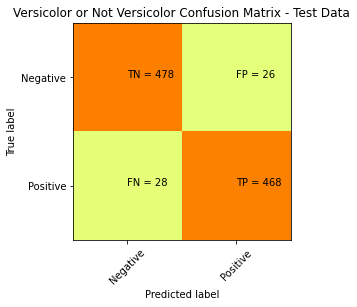

In [389]:
from sklearn.linear_model import LogisticRegression
model_reg = LogisticRegression()
model_reg.fit(X_train, y_train)
#lr_predict=model.predict(X_test)
#Actor_1= input("Actor Name        : ")
#Actor_2= input("Actor Name        : ")
#Actor_3= input("Actor Name        : ")
#Actor_4= input("Actor Name        : ")
#predict=[49,59,138,84]
#predict=["Soha Ali","Atif Aslam","Fawad Khan","Faisal Qureshi"]
#predict[0]=actor1.fit_transform([predict[0]])
##predict[1]=actor2.fit_transform([predict[1]].astype(str))
##predict[2]=actor3.fit_transform([predict[2]].astype(str))
#predict[3]=actor4.fit_transform([predict[3]].astype(str))
#predict1 = scaler.transform(predict)
#prediction=model_reg.predict(predict)
#if prediction.all() == 1:
#    print("HIT")
#else:
 #   print("FLOP")
model_reg.predict(X_test)
#model_reg.score(X_test,y_test)
from sklearn.metrics import confusion_matrix
predict_reg=cross_val_predict(model_reg,inputs,target,cv=10)
cm = confusion_matrix(target, predict_reg)
#print(lr_predict)
#print(y_test)
#print(cm)
score_lr=cross_val_score(model_reg,inputs,target,cv=10)
print(score_lr.mean())
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Random Forest Classifer

0.504


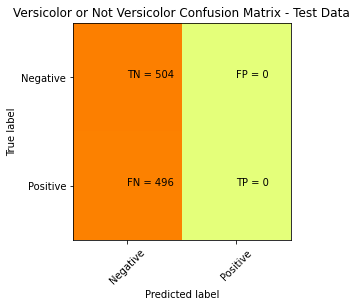

In [390]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
inputs, target = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=0.5, random_state=0)
clf.fit(X_train, y_train)
#Actor_1= input("Actor Name        : ")
#Actor_2= input("Actor Name        : ")
#Actor_3= input("Actor Name        : ")
#Actor_4= input("Actor Name        : ")
#predict=[49,59,138,84]
#predict=["Soha Ali","Atif Aslam","Fawad Khan","Faisal Qureshi"]
#predict[0]=actor1.transform([predict[0]])
#predict[1]=actor2.transform([predict[1]])
#predict[2]=actor3.transform([predict[2]])
#predict[3]=actor4.transform([predict[3]])
#predict = scaler.transform(predict)
#print(clf.score(X_test,y_test))
#clf.predict(predict)

clf_predict=clf.predict(X_test)
#print(clf.score(X_test,y_test))
from sklearn.metrics import confusion_matrix
#print(clf_predict)
#print(y_test)
predict_clf=cross_val_predict(clf,inputs,target,cv=10)
cm = confusion_matrix(target, predict_clf)
#print(cm)
score_rfc=cross_val_score(clf,inputs,target,cv=10)
print(score_rfc.mean())
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Support Vector Machines

0.946


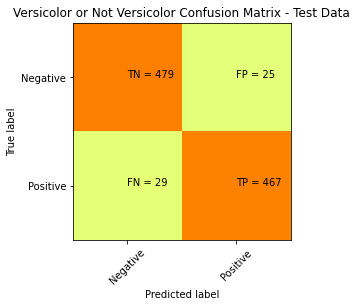

In [391]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
X_train,y_train = make_classification(n_features=4, random_state=0)
svc= make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
svc.fit(X_train, y_train)

#Actor_1= input("Actor Name        : ")
#Actor_2= input("Actor Name        : ")
#Actor_3= input("Actor Name        : ")
#Actor_4= input("Actor Name        : ")
#predict=[49,59,138,84]
#predict=["Soha Ali","Atif Aslam","Fawad Khan","Faisal Qureshi"]
#predict[0]=actor1.transform([predict[0]])
#predict[1]=actor2.transform([predict[1]])
#redict[2]=actor3.transform([predict[2]])
#predict[3]=actor4.transform([predict[3]])
#predict = scaler.transform(predict)
#svc.score(X_test,y_test)
#prediction=svc.predict(predict)
#if prediction.all() == 1:
#    print("HIT")
#else:
#    print("FLOP")
svc_predict=svc.predict(X_test)
#print(svc.score(X_test,y_test))
from sklearn.metrics import confusion_matrix
predict_svc=cross_val_predict(svc,inputs,target,cv=10)
cm = confusion_matrix(target, predict_svc)
#print(cm)
score_svm=cross_val_score(svc,inputs,target,cv=10)
print(score_svm.mean())
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


# Multi-Layer Perceptron

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[481  23]
 [ 25 471]]
0.952


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


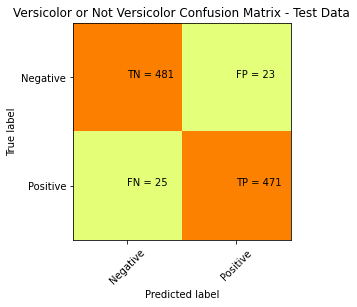

In [385]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
mlp_predict=mlp.predict(X_test)
#Actor_1= input("Actor Name        : ")
#Actor_2= input("Actor Name        : ")
#Actor_3= input("Actor Name        : ")
#Actor_4= input("Actor Name        : ")
#predict=[49,59,138,84]
#predict=["Soha Ali","Atif Aslam","Fawad Khan","Faisal Qureshi"]
#predict[0]=actor1.transform([predict[0]])
#predict[1]=actor2.transform([predict[1]])
#predict[2]=actor3.transform([predict[2]])
#predict[3]=actor4.transform([predict[3]])
#predict = scaler.transform(predict)
#mlp.score(X_test,y_test)
#prediction=mlp.predict(predict)
#if prediction.all() == 1:
#    print("HIT")
#else:
#    print("FLOP")

mlp_predict=mlp.predict(X_test)
#print(mlp.score(X_test,y_test))
from sklearn.metrics import confusion_matrix
predict_mlp=cross_val_predict(mlp,inputs,target,cv=10)
cm = confusion_matrix(target, predict_mlp)
#print(cm)
score_mlp=cross_val_score(mlp,inputs,target,cv=10)
print(score_mlp.mean())
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Decision Tree

[[469  35]
 [ 35 461]]
0.93


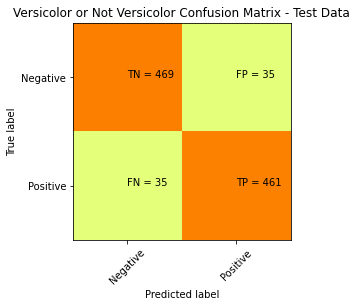

In [386]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
#dtc.score(X_test,y_test)
#Actor_1= input("Actor Name        : ")
#Actor_2= input("Actor Name        : ")
#Actor_3= input("Actor Name        : ")
#Actor_4= input("Actor Name        : ")
#predict=[49,59,138,84]
#predict=["Soha Ali","Atif Aslam","Fawad Khan","Faisal Qureshi"]
#predict[0]=actor1.transform([predict[0]])
#predict[1]=actor2.transform([predict[1]])
#predict[2]=actor3.transform([predict[2]])
#predict[3]=actor4.transform([predict[3]])
#predict = scaler.transform(predict)
#dtc.score(X_test,y_test)
#prediction=dtc.predict(predict)
#if prediction.all() == 1:
#    print("HIT")
#else:
#    print("FLOP")
dtc_predict=dtc.predict(X_test)
#print(dtc.score(X_test,y_test))
from sklearn.metrics import confusion_matrix
predict_dtc=cross_val_predict(dtc,inputs,target,cv=10)
cm = confusion_matrix(target, predict_dtc)
#print(cm)

score_dtc=cross_val_score(dtc,inputs,target,cv=10)
print(score_dtc.mean())
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# K_Neighbours Classfier

0.931


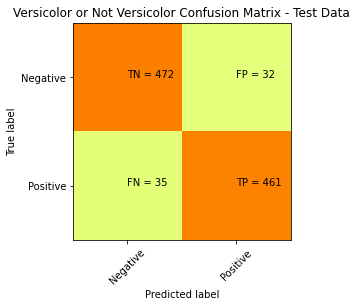

In [392]:
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.model_selection import cross_val_predict
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
#Actor_1= input("Actor Name        : ")
#Actor_2= input("Actor Name        : ")
#Actor_3= input("Actor Name        : ")
#Actor_4= input("Actor Name        : ")
#predict=[49,59,138,84]
#predict=["Soha Ali","Atif Aslam","Fawad Khan","Faisal Qureshi"]
#redict[0]=actor1.transform([predict[0]])
#predict[2]=actor3.transform([predict[2]])
#predict[3]=actor4.transform([predict[3]])
#predict = scaler.transform(predict)
#print(neigh.score(X_test,y_test))
#prediction=neigh.predict(predict)
#if prediction.all() == 1:
#    print("HIT")
#else:
#    print("FLOP")
neigh_predict=neigh.predict(X_test)
cross_neigh=cross_val_predict(neigh,inputs,target,cv=10)
#print(cross_neigh)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target, cross_neigh)
#print(cm)
score_neigh=cross_val_score(neigh,inputs,target,cv=5)
print(score_neigh.mean())
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

[0.931, 0.93, 0.952, 0.946, 0.504, 0.946, 0.7166666666666667]


<function matplotlib.pyplot.show>

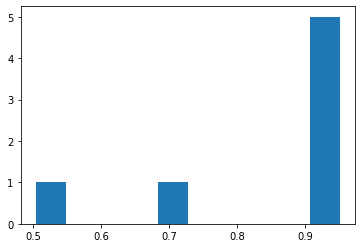

In [393]:
import matplotlib.pyplot as plt
hist=[score_neigh.mean(),score_dtc.mean(),score_mlp.mean(),score_svm.mean(),score_rfc.mean(),score_lr.mean(),score_nb.mean()]
print(hist)
plt.hist(hist,bins=10)
plt.show
